# Importing Models 

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import classification_report
from sklearn.pipeline import Pipeline

# Reading out Data

In [29]:
data = pd.read_csv(r"E:\MY_python_projects\Project_Patient_pal\Models\healthcare-dataset-stroke-data.csv")

In [30]:


print(data.head())
print(data.info())
print(data.isnull().sum())
print(data.describe())

      id  gender   age  hypertension  heart_disease ever_married  \
0   9046    Male  67.0             0              1          Yes   
1  51676  Female  61.0             0              0          Yes   
2  31112    Male  80.0             0              1          Yes   
3  60182  Female  49.0             0              0          Yes   
4   1665  Female  79.0             1              0          Yes   

       work_type Residence_type  avg_glucose_level   bmi   smoking_status  \
0        Private          Urban             228.69  36.6  formerly smoked   
1  Self-employed          Rural             202.21   NaN     never smoked   
2        Private          Rural             105.92  32.5     never smoked   
3        Private          Urban             171.23  34.4           smokes   
4  Self-employed          Rural             174.12  24.0     never smoked   

   stroke  
0       1  
1       1  
2       1  
3       1  
4       1  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 e

# Preprocessing

In [31]:
data['bmi'].fillna(data['bmi'].median(), inplace=True)

C:\Users\Turjo\AppData\Local\Temp\ipykernel_21528\1997496975.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['bmi'].fillna(data['bmi'].median(), inplace=True)


In [32]:
data.drop(columns=['id'], inplace=True)

In [33]:
df = data['gender'].map({'Male': 1.0, 'Female': 0.0})

In [34]:
data = pd.get_dummies(data, drop_first=True)

In [35]:
print(data.head())

    age  hypertension  heart_disease  avg_glucose_level   bmi  stroke  \
0  67.0             0              1             228.69  36.6       1   
1  61.0             0              0             202.21  28.1       1   
2  80.0             0              1             105.92  32.5       1   
3  49.0             0              0             171.23  34.4       1   
4  79.0             1              0             174.12  24.0       1   

   gender_Male  gender_Other  ever_married_Yes  work_type_Never_worked  \
0         True         False              True                   False   
1        False         False              True                   False   
2         True         False              True                   False   
3        False         False              True                   False   
4        False         False              True                   False   

   work_type_Private  work_type_Self-employed  work_type_children  \
0               True                    False  

# Data Visualization

Plot stroke distribution

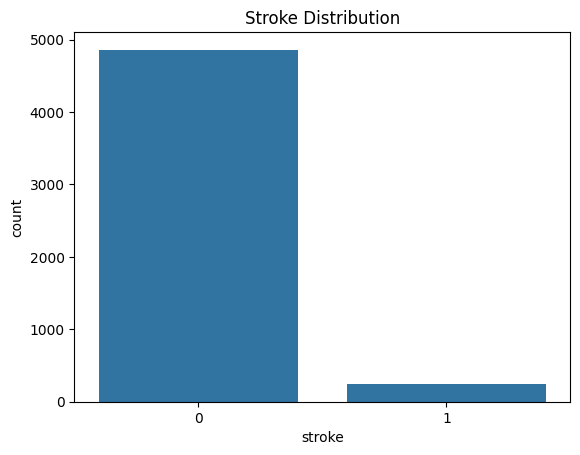

In [36]:
sns.countplot(x='stroke', data=data)
plt.title("Stroke Distribution")
plt.show()


Correlation heatmap

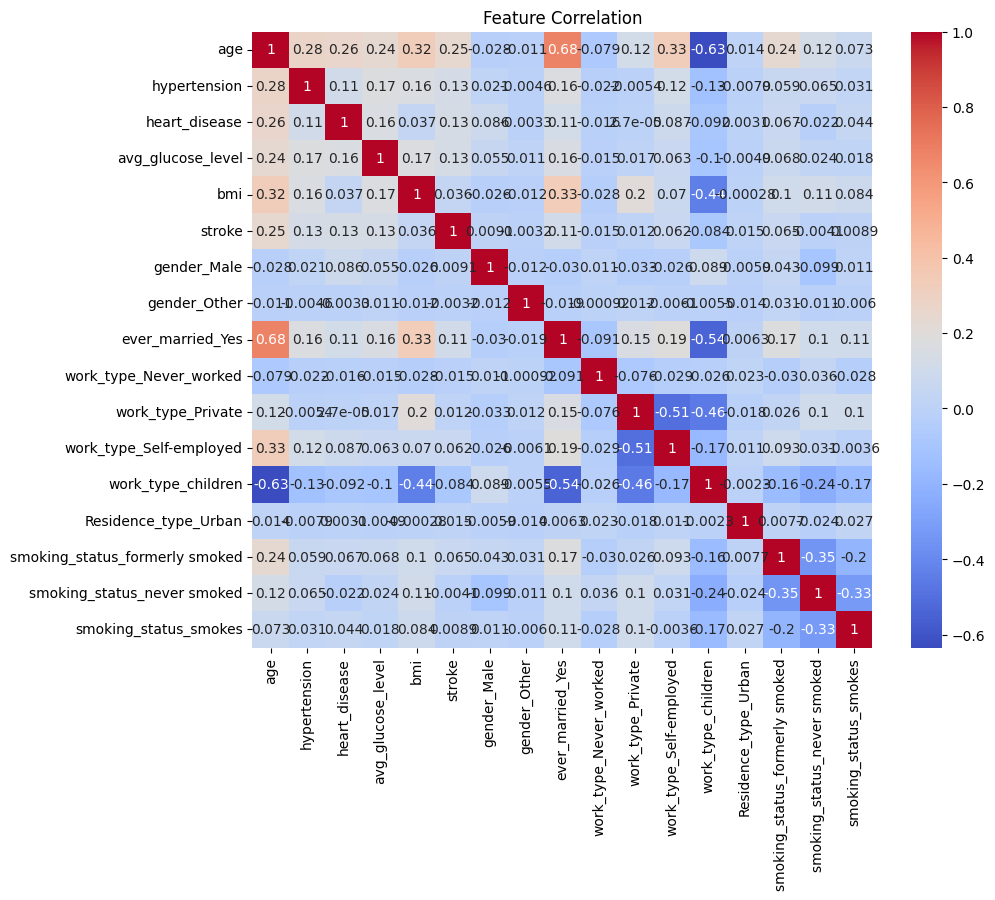

In [37]:
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), annot=True, cmap="coolwarm")
plt.title("Feature Correlation")
plt.show()

# Model Building

Setting a target variable

In [38]:
X = data.drop('stroke', axis=1)
y = data['stroke']

In [39]:
# Train_test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

In [40]:
# Standard Scaller
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [41]:
# Random Forest
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [42]:
y_pred = model.predict(X_test)

Evaluate the model

In [43]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.9510763209393346
Confusion Matrix:
 [[1457    1]
 [  74    1]]
Classification Report:
               precision    recall  f1-score   support

           0       0.95      1.00      0.97      1458
           1       0.50      0.01      0.03        75

    accuracy                           0.95      1533
   macro avg       0.73      0.51      0.50      1533
weighted avg       0.93      0.95      0.93      1533



Feature analysis

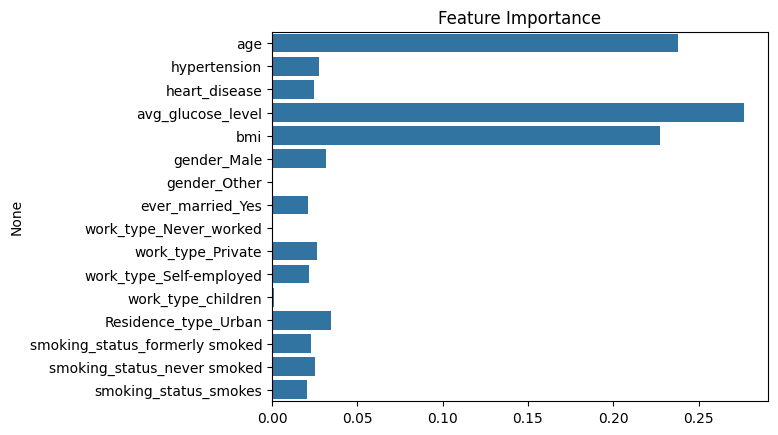

In [44]:
importances = model.feature_importances_
feature_names = X.columns

sns.barplot(x=importances, y=feature_names)
plt.title("Feature Importance")
plt.show()


In [45]:
print(data['stroke'].value_counts())


stroke
0    4861
1     249
Name: count, dtype: int64


In [46]:

print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.95      1.00      0.97      1458
           1       0.50      0.01      0.03        75

    accuracy                           0.95      1533
   macro avg       0.73      0.51      0.50      1533
weighted avg       0.93      0.95      0.93      1533



Init models

In [1]:
models = {
    "Logistic Regression": LogisticRegression(random_state=42),
    "Support Vector Machine (SVM)": SVC(random_state=42),
    "K-Nearest Neighbors (KNN)": KNeighborsClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42),
    "AdaBoost": AdaBoostClassifier(random_state=42)
}

# Store results
results = {}

NameError: name 'LogisticRegression' is not defined

In [48]:

for model_name, model in models.items():
    model.fit(X_train, y_train)  
    y_pred = model.predict(X_test)  
    
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred, output_dict=True)  
    
    results[model_name] = {
        "Accuracy": accuracy,
        "Precision": report['weighted avg']['precision'],
        "Recall": report['weighted avg']['recall'],
        "F1-Score": report['weighted avg']['f1-score']
    }


C:\Users\Turjo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Turjo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Turjo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\metrics\_classificati

In [49]:
results_df = pd.DataFrame(results).T
print(results_df)

                              Accuracy  Precision    Recall  F1-Score
Logistic Regression           0.951729   0.954060  0.951729  0.928825
Support Vector Machine (SVM)  0.951076   0.904546  0.951076  0.927228
K-Nearest Neighbors (KNN)     0.945858   0.904302  0.945858  0.924613
Gradient Boosting             0.949119   0.919557  0.949119  0.928602
AdaBoost                      0.949119   0.914801  0.949119  0.927455


In [50]:

# model_pipeline = Pipeline(steps=[
#     ('preprocessor', preprocessor),  # Keep preprocessing the same
#     ('classifier', LogisticRegression(random_state=42))  # Use Logistic Regression
# ])


In [51]:
# model_pipeline.fit(X_train, y_train)


In [52]:
# prediction = model_pipeline.predict(user_data)


In [53]:
#predict_stroke()

In [54]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import load_iris
import joblib

# Load dataset
data = load_iris()
X, y = data.data, data.target

# Train-test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train a model
model = LogisticRegression()
model.fit(X_train_scaled, y_train)

# Save the scaler and model
joblib.dump(scaler, "scaler_model.joblib")
joblib.dump(model, "logistic_model.joblib")

print("Scaler and model saved successfully!")

Scaler and model saved successfully!
